<a href="https://colab.research.google.com/github/alindote/MES/blob/desafios/MES_desafio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [ ]:
## Valores iniciais

# arrays com o número de átomos e moléculas
nA = np.array([100])
nB = np.array([100])
nAB = np.array([0])

# constantes de formação e separação
kD = 0.01
kB = 0.1

# tempo máximo
tmax = 100

# array com os instantes das reacções
t = np.array([0])

In [ ]:
# Ciclo temporal
while t[-1] < tmax:
  RD = kD * nA[-1] * nB[-1] # taxa de formação (A+B -> AB)
  RB = kB * nAB[-1]         # taxa de separação (AB -> A+B)
  RT = RD + RB              # taxa total de reacções
  dt = -np.log(rnd.rand())/RT   # intervalo de tempo até à próxima reacção
                                # (ver amostragem exponencial na aula 1)

  if rnd.rand() < (RD/RT):          # reacção de formação
    nA = np.append(nA, nA[-1] - 1)  # A e B diminuem, AB aumenta
    nB = np.append(nB, nB[-1] - 1)
    nAB = np.append(nAB, nAB[-1] + 1)
  else:                             # reacção de separação
    nA = np.append(nA, nA[-1] + 1)  # A e B aumentam, AB diminui
    nB = np.append(nB, nB[-1] + 1)
    nAB = np.append(nAB, nAB[-1] - 1)

  t = np.append(t, t[-1] + dt)   # acrescentamos o novo instante temporal

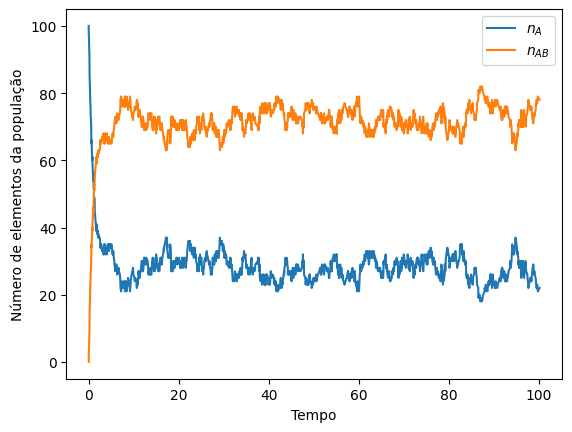

In [ ]:
# gráfico com a evolução temporal das populações
plt.figure()
plt.plot(t, nA, label='$n_A$')
#plt.plot(t, nB, label='$n_B$')
plt.plot(t, nAB, label='$n_{AB}$')
plt.xlabel('Tempo')
plt.ylabel('Número de elementos da população')
plt.legend()
plt.show()